In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Exercise 2

In [2]:
data = np.loadtxt(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt"
)

Text(0, 0.5, 'Frequency')

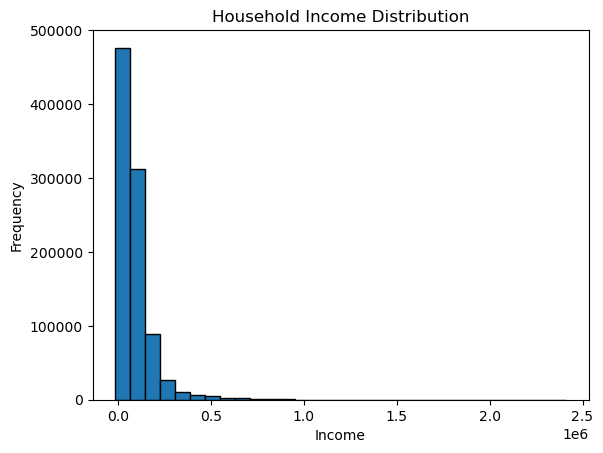

In [3]:
plt.hist(data, bins=30, edgecolor="k")
plt.title("Household Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")

- Does it look like a normal distribution? 
>No it does not look like a normal distribution
- Uniform? 
>No
- Does this make you think that in common equality is relatively high or low in the United States? 
>Relatively high

# Exercise 3

In [4]:
new_data = data[data < 500000]

Text(0, 0.5, 'Frequency')

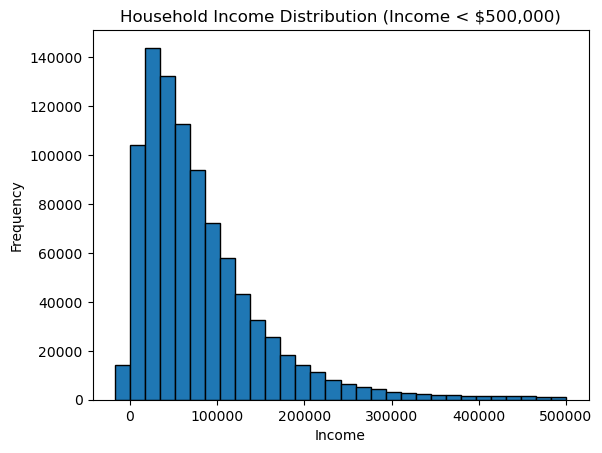

In [5]:
plt.hist(new_data, bins=30, edgecolor="k")
plt.title("Household Income Distribution (Income < $500,000)")
plt.xlabel("Income")
plt.ylabel("Frequency")

> This is right skew distribution. The skewness in the US income distribution driven by extreme high earners.

In [6]:
# pip install ineqpy

In [7]:
from ineqpy.inequality import gini

# Exercise 4

The US poverty line is about 20,000 dollars a year. What share of households in these data fall below the US poverty line?

In [8]:
# Calculate the share of households below 20000
subset_20 = data[data < 20000]
households_below_20 = len(subset_20) / len(data)

# Calculate the Gini Index
gini_score = gini(data)

print("The share of households below 20000:", households_below_20)
print("The Gini index:", gini_score)

The share of households below 20000: 0.14711442173300704
The Gini index: 0.4810925546879211


# Exercise 5
How does the US compare to other countries? Is that what you expected?
>US has a very high gini index, according to the calculation above (48,1). Comparing to countries in Africa, US is in the range of some countries here. The big inequality gap in the US is what I have heard long time ago, so this does not surprise me.

# Exercise 6

`Policy A`: giving every household that makes less than 40,000 dollars a check for 5,000 dollars, or
`Policy B`: giving every household that makes less than 30,000 dollars a check for 7,000 dollars.

In [9]:
# Define the income and check for Policy A and B
income_a = 40000
check_a = 5000

income_b = 30000
check_b = 7000

# Calculate the new distributions for Policy A and B
policy_a = data + np.where(data < income_a, 5000, 0)
policy_b = data + np.where(data < income_b, 7000, 0)

# Calculate the new gini index
gini_a = gini(policy_a)
gini_b = gini(policy_b)

# Define which lowered more inequality
lowered_more = "Policy A" if gini_a < gini_b else "Policy B"

print("Gini under Policy A:", gini_a)
print("Gini under Policy B:", gini_b)
print("Policy that lowered inequality more:", lowered_more)

Gini under Policy A: 0.46024685074894556
Gini under Policy B: 0.4582821778789707
Policy that lowered inequality more: Policy B


# Exercise 7
Now the president would like to know whether income inequality can be reduced more the policy you decided was preferable above, or through `Policy C`: applying a tax of 5% to households making more than 250,000 dollars and using the money to pay down the National Debt.

In [10]:
# Define income and tax rate for Policy C
income_c = 250000
tax_rate = 0.05

# Create a new income data for Policy C
income_policy_c = data.copy()

# Calculate new distribution for Policy C
income_policy_c[income_policy_c > income_c] -= (
    income_policy_c[income_policy_c > income_c] * tax_rate
)

# Calculate gini index for Policy C
gini_c = gini(income_policy_c)

print("Gini under Policy C:", gini_c)

Gini under Policy C: 0.4756173843900714


# Exercise 8
Now suppose we were thinking about applying a 5% tax to people making more than 250,000 dollars and evenly distributed that tax revenue to households earning less than 30,000 dollars. Call this `Policy D`.

In [11]:
# Define tax rate and income for Policy D
tax_rate_d = 0.05
income_d = 250000
data[data > income_d] * tax_rate_d
# Calculate the tax revenue generated of income for all households earning more than 25000
revenue_raised = np.sum(data[data > income_d] * tax_rate_d)

# Print the estimated revenue
print("Estimated tax revenue raised by Policy D:", revenue_raised)

Estimated tax revenue raised by Policy D: 929623340.85


# Exercise 9
Now calculate the total number of households earning less than 30,000 dollars in these data, and divide the revenue generated by the tax by the number of households earning less than 30,000 dollars. This is the amount of transfer these household would receive. Store in your results dict with the key "ex9_transfers".

In [12]:
income_below_30000 = 30000

# Calculate the total number of households earning less than $30,000
total_households_below_30000 = len(data[data < income_below_30000])

# Calculate the estimated tax revenue each of these households would receive
estimated_revenue_per_household = revenue_raised / total_households_below_30000

# Print the estimated transfers
print("Estimated transfers per household:", estimated_revenue_per_household)

Estimated transfers per household: 4208.230382379836


# Exercise 10
Finally, update the incomes in our data as if we had enacted this policy – reduce the incomes of households earning more than 250,000 dollars by 5% and increase the incomes of households earning less than 30,000 dollars by the quantity you estimated in Question 8.

What is the resulting Gini Index of `Policy D`? Store as `ex10_gini_policy_d`.

In [13]:
# Create a copy of the original income data
income_policy_d = data.copy()

# Apply Policy D: Reduce incomes above $250,000 by 5% and increase incomes below $30,000 by the estimated transfer amount
income_policy_d[income_policy_d > income_d] *= 1 - tax_rate_d
income_policy_d[income_policy_d < income_below_30000] += estimated_revenue_per_household

# Calculate the Gini Index for Policy D
gini_d = gini(income_policy_d)

# Print the resulting Gini Index for Policy D
print("Gini Index of Policy D after updating incomes:", gini_d)

Gini Index of Policy D after updating incomes: 0.46166900570205466


# Exercise 11
Now suppose we also wanted to explore a slightly different intervention: Policy E. In Policy E, we would distribute the revenue generated with the same tax, but this time we would distribute it evenly to all households earning less than 40,000 dollars (instead of less than 30,000 dollars).

What is the resulting Gini Index of `Policy E`? Store as `ex11_gini_policy_e`.

In [14]:
income_below_40000 = 40000

# Calculate the total number of households earning less than $40,000
total_households_below_40000 = np.sum(data < income_below_40000)

# Calculate the estimated tax revenue each of these households would receive
estimated_revenue_per_household_40000 = revenue_raised / total_households_below_40000
# Create a copy of the original income data
income_policy_e = data.copy()

# Apply Policy D: Reduce incomes above $250,000 by 5% and increase incomes below $30,000 by the estimated transfer amount
income_policy_e[income_policy_e > income_d] *= 1 - tax_rate_d
income_policy_e[
    income_policy_e < income_below_40000
] += estimated_revenue_per_household_40000

# Calculate the Gini Index for Policy D
gini_e = gini(income_policy_e)

# Print the resulting Gini Index for Policy E
print("Gini Index of Policy E after updating incomes:", gini_e)

Gini Index of Policy E after updating incomes: 0.46264861963052434


# Exercise 12
Assign the string "Policy D" or "Policy E" to your results dict under the key `ex12_policy_recommendation`.

In [15]:
data < income_below_40000
data

array([ 53308., 102050., 192994., ..., 407460.,  19856., 154754.])

In [16]:
policy_recommendation = "Policy D" if gini_d < gini_e else "Policy E"
print("Recommended Policy is:", policy_recommendation)

Recommended Policy is: Policy D


# Results

In [17]:
results = {
    "ex4_share_below_poverty": households_below_20,
    "ex4_gini": gini_score,
    "ex6_gini_policy_a": gini_a,
    "ex6_gini_policy_b": gini_b,
    "ex6_gini_which_reduced_more": lowered_more,
    "ex7_gini_policy_c": gini_c,
    "ex8_revenue_raised": revenue_raised,
    "ex9_transfers": estimated_revenue_per_household,
    "ex10_gini_policy_d": gini_d,
    "ex11_gini_policy_e": gini_e,
    "ex12_policy_recommendation": policy_recommendation,
}

In [18]:
assert set(results.keys()) == {
    "ex4_share_below_poverty",
    "ex4_gini",
    "ex6_gini_policy_a",
    "ex6_gini_policy_b",
    "ex6_gini_which_reduced_more",
    "ex7_gini_policy_c",
    "ex8_revenue_raised",
    "ex9_transfers",
    "ex10_gini_policy_d",
    "ex11_gini_policy_e",
    "ex12_policy_recommendation",
}

In [19]:
results

{'ex4_share_below_poverty': 0.14711442173300704,
 'ex4_gini': 0.4810925546879211,
 'ex6_gini_policy_a': 0.46024685074894556,
 'ex6_gini_policy_b': 0.4582821778789707,
 'ex6_gini_which_reduced_more': 'Policy B',
 'ex7_gini_policy_c': 0.4756173843900714,
 'ex8_revenue_raised': 929623340.85,
 'ex9_transfers': 4208.230382379836,
 'ex10_gini_policy_d': 0.46166900570205466,
 'ex11_gini_policy_e': 0.46264861963052434,
 'ex12_policy_recommendation': 'Policy D'}

# Data Citation
Steven Ruggles, Sarah Flood, Sophia Foster, Ronald Goeken, Jose Pacas, Megan Schouweiler and Matthew Sobek. IPUMS USA: Version 11.0 [dataset]. Minneapolis, MN: IPUMS, 2021. https://doi.org/10.18128/D010.V11.0